<a href="https://colab.research.google.com/github/Argarm/FSI/blob/master/Red_PvsG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocedor de Monadas y Chuchos
Vamos a crear una red neuronal que sepa distinguir entre gatos y perros, para ello primero he cargado el [dataset](https://www.dropbox.com/s/c77j38nr5kb76tz/dogs_and_cats.zip?dl=0) de perros y gatos en mi drive y a continuacion he enlazado este archivo colab con el Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Ejemplo del dataset
Primero he comprobado que el dataset cargado es el esperado mostrando una imagen de un gato

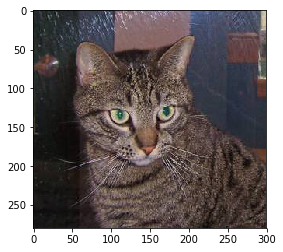

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

example= Image.open('/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/train/cats/cat.1.jpg','r')
imshow(np.asarray(example))


#Preparacion de los datos

In [0]:
train='/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/train'
validacion='/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/validation'

path='/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/validation/'




#Modelo


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras import backend as K
import keras
from time import time

# --------------------------------------------------------- DATOS ---------------------------------------------------------
batch_size = 20

train_datagen = ImageDataGenerator(
        rescale=1./255,
         shear_range=0.2,
         zoom_range=0.2,
         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        path,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')



Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [0]:
probabilities = model.predict_generator(validation_generator, 1000)

In [0]:
import matplotlib.pyplot as plt

path='/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/validation/'

index = 29
path= path+validation_generator.filenames[index]

print(path)

example= Image.open(path,'r')
imshow(np.asarray(example))
probability =probabilities[index][0]
if probability >0.5:
  plt.title("%.2f" % (probabilities[index][0]*100) + "% Dog")
else:
  plt.title("%.2f" % (probabilities[index][1]*100) + "% Cat")

/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/validation/cats/cat.1029.jpg


In [0]:
model = Sequential()


model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# model.summary()


In [17]:

epochs = 30

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/30
100/100 [==============================] - 27s 271ms/step - loss: 1.0627 - acc: 0.5745 - val_loss: 1.4900 - val_acc: 0.5244
Epoch 2/30
100/100 [==============================] - 25s 249ms/step - loss: 0.7074 - acc: 0.6190 - val_loss: 0.6412 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 25s 250ms/step - loss: 0.6754 - acc: 0.6340 - val_loss: 0.7092 - val_acc: 0.5800
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6288 - acc: 0.6720 - val_loss: 0.8041 - val_acc: 0.6000
Epoch 5/30
100/100 [==============================] - 26s 256ms/step - loss: 0.5920 - acc: 0.6930 - val_loss: 0.6840 - val_acc: 0.6400
Epoch 6/30
100/100 [==============================] - 25s 248ms/step - loss: 0.5650 - acc: 0.7085 - val_loss: 1.0562 - val_acc: 0.4600
Epoch 7/30
100/100 [==============================] - 25s 248ms/step - loss: 0.5470 - acc: 0.7270 - val_loss: 1.0912 - val_acc: 0.5600
Epoch 8/30
100/100 [==============================] - 2

In [0]:
probabilities=model.predict_generator(validation_generator,1000) 

/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/validation/cats/cat.1124.jpg


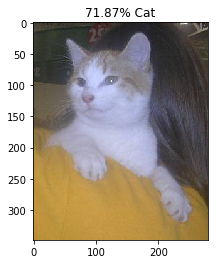

In [29]:
import matplotlib.pyplot as plt

path='/content/drive/My Drive/3_Curso/Curso_3.2/FSI/Datasets/dogs_and_cats/validation/'

index = 124
path= path+validation_generator.filenames[index]

print(path)

example= Image.open(path,'r')
imshow(np.asarray(example))
probability =probabilities[index][0]
if probability >0.5:
  plt.title("%.2f" % (probabilities[index][0]*100) + "% Cat")
else:
  plt.title("%.2f" % (probabilities[index][1]*100) + "% Dog")